In [15]:
import numpy as np
import matplotlib.pyplot as plt
from Pad import PadZero

np.random.seed(1)

In [17]:
def SingleSlice(tensor, weights, bias):
    return np.sum((tensor * weights) + bias)

In [18]:
def ConvForward(a,w,b, hyperparameters):
    
    (m, oldnH, oldnW, oldnC) = a.shape#Input tensor
    (f,f,oldnC) = w.shape#Input weights
    
    stride = hyperparameters["stride"]#Input stride
    pad = hyperparameters["padding"]#Input padding
    
    newNH = int((oldnH -f + 2 * pad)/stride) + 1#The height of the new tensor
    newNW = int((oldnW -f + 2 * pad)/stride) + 1#The width of the new tensor
    
    z = np.zeros((m,newNH,newNW,oldnC), dtype = np.int32)#Empty new tensor
    aPad = PadZero(a, pad)#Padding of the new tensor
    (m, nH, nW, nC) = aPad.shape#Getting a new shape
    
    for m1 in range(m):
        for i,h1 in enumerate(range(0,nH-f+1,stride)):#Step == stride
            for j,w1 in enumerate(range(0,nW-f+1,stride)):#Step == stride
                for c1 in range(nC):
                    z[m1,i,j,c1] = SingleSlice(aPad[m1,h1:h1+f,w1:w1+f,c1],w[:,:,c1],b)
                
    assert(z.shape == (m, oldnH, oldnW, oldnC))#Check the output shape
    
    cache = (a,w,b, hyperparameters)#Parameters for back propagation
    
    return z, cache


filter: 
 [[1 1 1]
 [1 1 1]
 [1 1 1]]


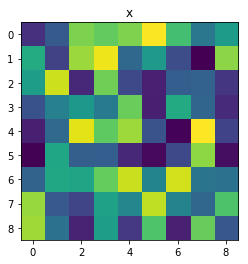

In [19]:
m = 2
nH = 9
nW = 9
nC = 3
sizeFilter = 3
stride = 1
pad = 1
x = np.random.randint(0,256,(m,nH,nW,nC))
w = np.ones((sizeFilter,sizeFilter,nC), dtype = np.int32)
b = 0
hyperparameters = {"stride": stride, "padding":pad}
print("filter: \n", w[:,:,0])

fig, ax1 = plt.subplots(1,1)
ax1.set_title("x")
ax1.imshow(x[0,:,:,0])


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


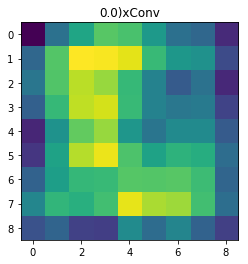

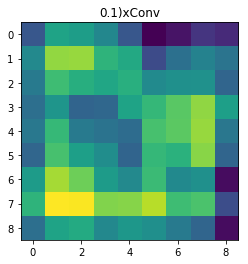

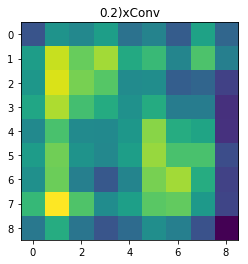

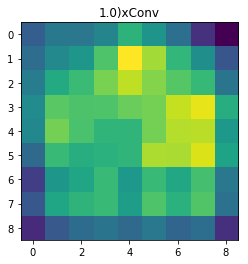

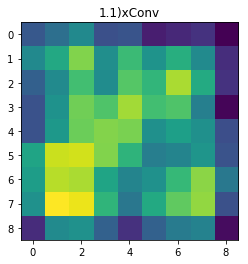

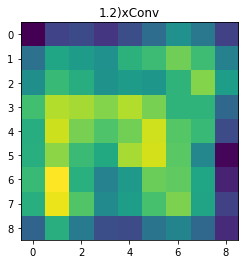

In [20]:
z,cache = ConvForward(x,w,b,hyperparameters)

for i in range(m):
    for j in range(nC):
        #print("{}.{})xConv: \n{}".format(i,j,z[i,:,:,j]))
        fig, ax2 = plt.subplots(1,1)
        ax2.set_title("{}.{})xConv".format(i,j))
        ax2.imshow(z[i,:,:,j])
